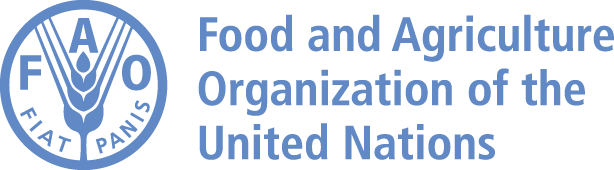

# <u>Partie A</u> : Analyse des données en 2017 (Demandes de Marc)
## <u>Analyse 1</u> : la proportion de personnes en état de sous-nutrition

Tout d'abord, j'ai importé les bibliothèques de Python et les données FAO (sous forme de fichier en csv) dans Jupyter Notebook.

In [1]:
# Importer les bibliothèques de Python
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Importer les données
sous_nutrition = pd.read_csv('sous_nutrition.csv')
population = pd.read_csv('population.csv')
dispo_alimentaire = pd.read_csv('dispo_alimentaire.csv')
aide_alimentaire = pd.read_csv('aide_alimentaire.csv')

In [3]:
# Etude des données
sous_nutrition.info()
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    1218 non-null   object
 1   Année   1218 non-null   object
 2   Valeur  624 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB


En excécutant le script <i>df.info()</i>, je découvre que la colonne 'Valeur' du fichier sous_nutrition est un datatype 'Object' et qui ne peut pas être aplliquée des fonctions de calculs. Donc, j'appelle les fonctions <i>df.value_counts()</i> et <i>df.plot()</i> pour chercher la répartition des valeurs nulls et les valeurs dites '<0.1'.

<AxesSubplot:>

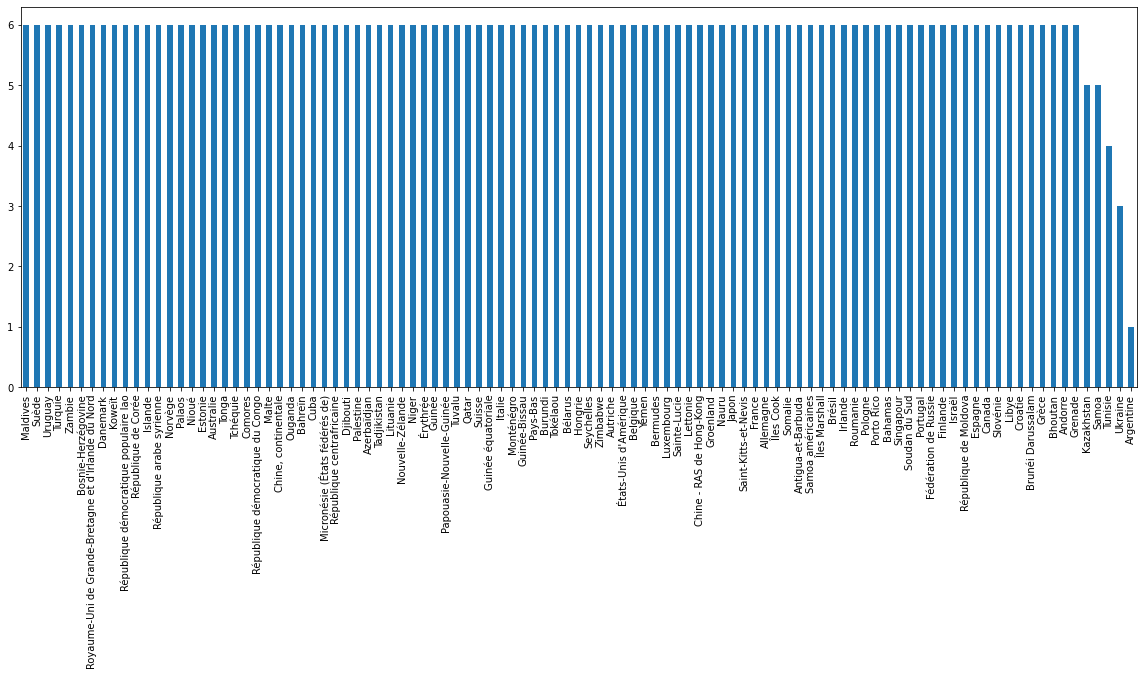

In [4]:
# Calculer le nombre de valeur = null
display(sous_nutrition[sous_nutrition['Valeur'].isna()]['Zone'].value_counts().plot(kind = 'bar', figsize = (20,7)))

La répartition des valeurs nulls est aléatoire, il n'y a pas la distinction entre les pays dévellopés, pays en développement et pays pauvres. La raison de ce manquant est d'origine de la difficulté à enregistrer de données dû à la geurre, chez les pays pauvres, ou dû au effet négligeable des cas de sous_nutrition chez les pays développés...

<AxesSubplot:>

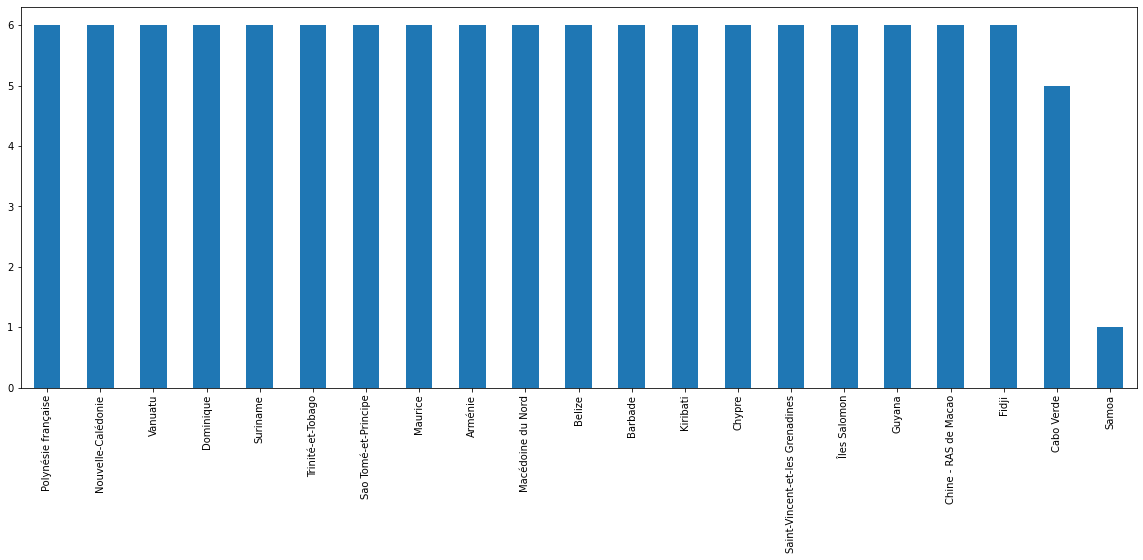

In [5]:
# Nb de valeurs < 0.1
sous_nutrition[sous_nutrition['Valeur'] == '<0.1']['Zone'].value_counts().plot(kind = 'bar', figsize = (20,7))

La répartition des valeurs dites '<0.1' est aléaroire comme celle des valeurs nulls. C'est pour cette raison, je fais un remplacement des 2 types de valeurs (null et <0.1) par la valeur '0' afin de faire des analyses sur le nombre de personnes en état de sous-nutrition.

In [6]:
# Changer le type de données du colonne 'Valeurs' (Object -> Float) en ignorant les errors concernant les valeurs <0.1
sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'], errors = 'coerce')

# Remplacer les valeurs NaN et < 0.1 par 0 sur df (inplace = True)
sous_nutrition.fillna(0, inplace = True)

sous_nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1218 non-null   object 
 1   Année   1218 non-null   object 
 2   Valeur  1218 non-null   float64
dtypes: float64(1), object(2)
memory usage: 28.7+ KB


Maintenant, on ne trouve pas les valeurs nulles dans sous-nutrition et l'intégralité des lignes est remplie correctement.

Ensuite, afin de faciliter l'analyse, je change également les noms des colonnes des df 'sous-nutrition' et 'population' pour homologuer la nomination des données, notament les colonnes 'Valeur'. 

De plus, on sait que le nombre de personnes en état de sous_nutrition est exprimé en moyenne de la tranche des 3 années, ou la tranche '2013-2015' nous donne les informations de l'année 2014, donc, j'ai changé tous les tranches de l'année dans le df 'sous_nutrition' par les années précises. 

Avant de remplacer des années, je compte également le nombre de données groupés par chaque variables dans la colonne 'Année'. On observe 6 tranches d'années qui sont des années de 2013 à 2018 et correspondent aux nombres des années observées dans le fichier population.

In [7]:
print('Observation des années du df populaion')
sous_nutrition['Année'].value_counts().to_frame()

Observation des années du df populaion


,Année
2013-2015,203
2016-2018,203
2015-2017,203
2012-2014,203
2014-2016,203
2017-2019,203


In [8]:
# Changer le nom des colonnes
sous_nutrition.rename(columns = {"Valeur" : "Personnes_sous_nutrition"}, inplace = True)
population.rename(columns = {"Valeur" : "Population"}, inplace = True)

# Remplacer les valeurs de la colonne 'Année'
sous_nutrition['Année'] = sous_nutrition['Année'].replace(['2012-2014','2013-2015', '2014-2016', '2015-2017', '2016-2018', '2017-2019']\
                                                          ,['2013','2014', '2015', '2016', '2017', '2018'])
display(sous_nutrition.head())
population.head()

,Zone,Année,Personnes_sous_nutrition
0,Afghanistan,2013,8.6
1,Afghanistan,2014,8.8
2,Afghanistan,2015,8.9
3,Afghanistan,2016,9.7
4,Afghanistan,2017,10.5


,Zone,Année,Population
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


Suite à la première demande d'analyse de Marc, je fais une jointure interne entre les 2 df "sous_nutrtition" et "population" en choissant des données de 2017. Pour cela, j'appele la fonction df1.merge(df2). Le résutat de cette jointure est appellé 'analyse1', qui possède des données en 2017 sur l'état de sous_nutrition des pays ansi que la population de chaque pays.

A noter que la colonne "Personnes_sous_nutrition" est exprimée en millions d'habitants et la colonne "Population" exprimée en milliers d’habitants.

In [9]:
# Jointure interne
analyse1 = sous_nutrition[sous_nutrition['Année'] == '2017'][['Zone', 'Personnes_sous_nutrition']]\
.merge(population[population['Année'] == 2017][['Zone', 'Population']], on = 'Zone')
analyse1.head()

,Zone,Personnes_sous_nutrition,Population
0,Afghanistan,10.5,36296.113
1,Afrique du Sud,3.1,57009.756
2,Albanie,0.1,2884.169
3,Algérie,1.3,41389.189
4,Allemagne,0.0,82658.409


In [10]:
# la proportion de personnes en état de sous-nutrition
proportion_sous_nutrition = (analyse1['Personnes_sous_nutrition']*10**6).sum()*100/(analyse1['Population']*10**3).sum()
print('Analyse 1 : Proportion des personnes en sous nutrition est ' + str(round(proportion_sous_nutrition, 3)) + '%')

Analyse 1 : Proportion des personnes en sous nutrition est 7.101%


Ici, on obtient une proportion de 7,101% de personnes en état sous_nutrition  en comparant avec la population en 2017. Afin d'avoir une vue globale sur ce résultat, je calcule également cette indice des années de 2013 à 2018. Pour cela, je convertis le datatype 'Object' de la colonne 'Année' du fichier sous_nutrition au type numérique puis je fais une jointure interne (tmp_a1) des 2 fichiers précédentes sur les colonne 'Année' et 'Zone'.

Proportion des personnes en état de sous_nutrition du monde par année, de 2013 à 2018


,Personnes_sous_nutrition,Population,Proportion_sous_nutri_année
Année,,,
2013,528.1,7206670.140,7.327934
2014,523.5,7291346.928,7.179743
2015,524.7,7375818.210,7.113787
2016,528.6,7460004.222,7.085787
2017,535.7,7543798.779,7.101197
2018,544.2,7626986.351,7.135190


Evolution de la proportion des personnes en état de sous_nutrition du monde par année, de 2013 à 2018 


<AxesSubplot:xlabel='Année'>

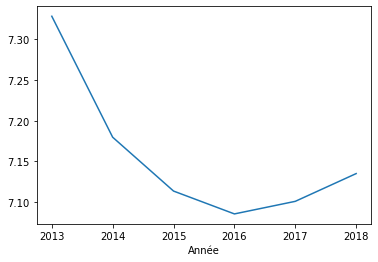

In [11]:
# Convertir le type de donnée
sous_nutrition['Année'] = pd.to_numeric(sous_nutrition['Année'])

# Jointure interne
tmp_a1 = sous_nutrition[['Zone','Année', 'Personnes_sous_nutrition']]\
.merge(population[['Zone','Année', 'Population']], on = ['Année', 'Zone'])
tmp_a1 = tmp_a1.groupby(by = 'Année').sum()

# Calculer des proportions
tmp_a1['Proportion_sous_nutri_année'] = tmp_a1['Personnes_sous_nutrition']*10**6*100/(tmp_a1['Population'] * 10**3)
print('Proportion des personnes en état de sous_nutrition du monde par année, de 2013 à 2018')
display(tmp_a1)
print('Evolution de la proportion des personnes en état de sous_nutrition du monde par année, de 2013 à 2018 ')
tmp_a1['Proportion_sous_nutri_année'].plot(kind = 'line')

<b><u>Observation</u></b> : 

La proportion des personnes en sous nutrition en 2017 est <b>7.101%</b> et relativement similaire aux proportions des autres années. Elle est la tendance à améliorer de 2013 à 2016 et à augmenter depuis 2017 à 2018. En générale, cette proportion est <b>significative</b> ou il y a <b>plus de 7/100 personnes</b> qui sont en état de sous_nutrition sur le monde depuis 2013 jusqu'à 2018 et ce nombre a commencé à augmenter en 2017.

C'est pour cette raison, maintenant, nous nous intéressons aux nombres théoriques de personnes qui pourraient être nourries (calculés à partir de la disponibilité alimentaire mondiale totale et des produits végétaux) pour essayer à trouver la cause de cette situation. Ces 2 analyses (Analyse 2 et 3) seront effectuées par la suite, sous la demande de Marc.

## <u>Analyse 2</u> : le nombre théorique de personnes qui pourraient être nourries (calculé à partir de la disponibilité alimentaire mondiale)

Tout d'abord, je fais une étude de donnée du fichier dispo_alimentaire.csv. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   Produit                                                        15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          2720 non-null   float64
 4   Autres Utilisations                                            5496 non-null   float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 14241 non-null  float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         14015 non-null  float64
 7   Disponibilité de matière grasse en quantité (g/personne/jo

<AxesSubplot:>

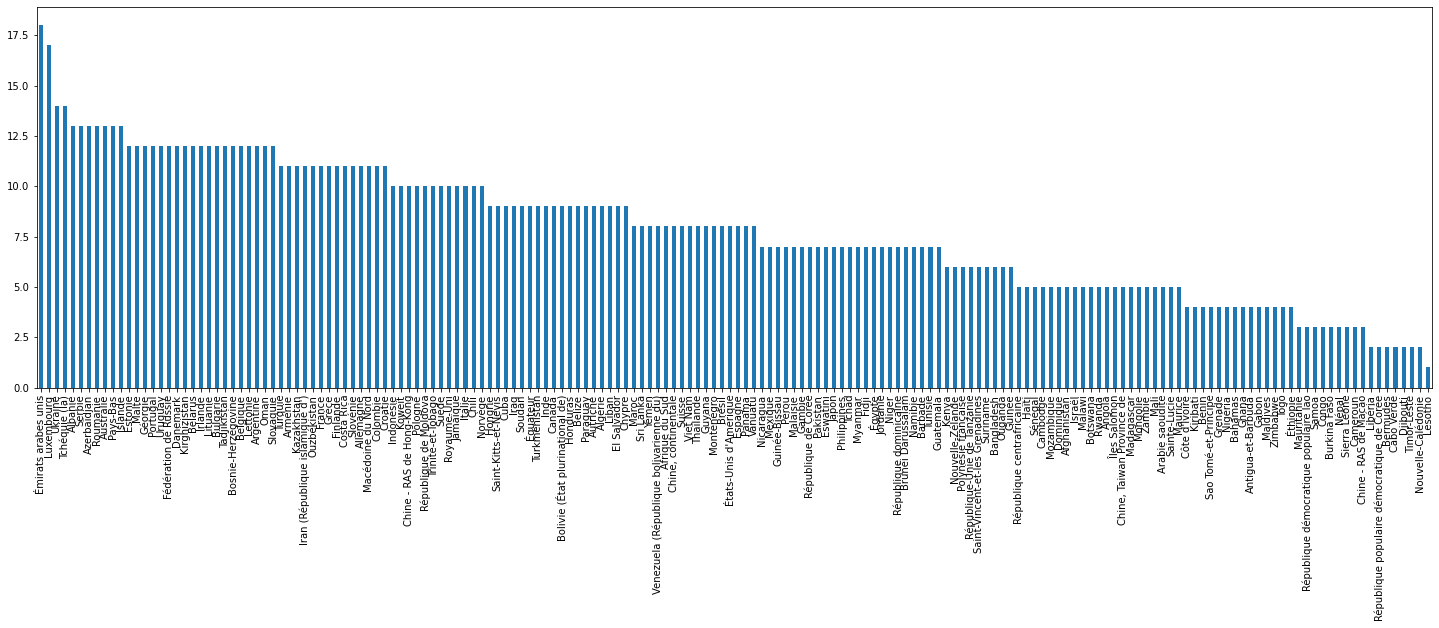

In [12]:
# Etude de données
dispo_alimentaire.info()

# Répartition des valeurs NULLS
dispo_alimentaire[dispo_alimentaire['Disponibilité alimentaire (Kcal/personne/jour)'].isna()]\
.reset_index()['Zone'].value_counts().plot(kind = 'bar', figsize = (25,7))

Après exécution de la fonction df.info(), je trouve que les valeurs à calculées sont déjà sous forme numérique même s'il existe également les valeurs nulls dû à la difficulté de la collecte des données que j'ai expliqué dans la partie précédente.

J'effectue une jointure interne des 2 df 'dispo_alimentaire' et 'population' en 2017 par la colonne 'Zone' pour faire des calculs. Afin de faciliter l'afichage des données, je choisi que les colonnes nécessaires pour notre analyse. Cette jointure interne est nommée 'analyse2'.

A noter que l'unité de la population de 2017 est en milliers habitants/an tandis que l'unité de la disponibilité alimentaire est exprimée par jour. Donc, il faut multiplier les valeurs de disponibilté par 365 jours pour avoir une cohérence de données.

In [13]:
# Jointure interne
dispo_ali_population_2017 = dispo_alimentaire.merge(population[population['Année'] == 2017][['Zone','Population']], on = 'Zone')
dispo_ali_population_2017['Dispo_ali_2017'] = dispo_ali_population_2017['Disponibilité alimentaire (Kcal/personne/jour)'] * (dispo_ali_population_2017['Population'] * 10**3) * 365
analyse2 = dispo_ali_population_2017[['Zone', 'Disponibilité alimentaire (Kcal/personne/jour)', 'Population', 'Dispo_ali_2017']]
print('Disponibité alimentaire (Kcal/an) pour type de produit et chaque pays en 2017')
analyse2

Disponibité alimentaire (Kcal/an) pour type de produit et chaque pays en 2017


,Zone,Disponibilité alimentaire (Kcal/personne/jour),Population,Dispo_ali_2017
0,Afghanistan,5.0,36296.113,6.624041e+10
1,Afghanistan,1.0,36296.113,1.324808e+10
2,Afghanistan,1.0,36296.113,1.324808e+10
3,Afghanistan,0.0,36296.113,0.000000e+00
4,Afghanistan,4.0,36296.113,5.299232e+10
...,...,...,...,...
15411,Îles Salomon,45.0,636.039,1.044694e+10
15412,Îles Salomon,11.0,636.039,2.553697e+09
15413,Îles Salomon,0.0,636.039,0.000000e+00
15414,Îles Salomon,0.0,636.039,0.000000e+00


In [14]:
total_dispo_alimentaire = analyse2['Dispo_ali_2017'].sum()
print('Energie totale (en terme calorique) disponible dans le monde en 2017 est ' + str(total_dispo_alimentaire) + ' KCal')

nb_pers_nourries_mondiale = total_dispo_alimentaire / (2500 * 365)
print('Analyse 2 : le nombre théorique de personnes qui pourraient être nourries (soit 2500 kcal/personne/jour) est ' + str(int(nb_pers_nourries_mondiale)) + ' personnes')

Energie totale (en terme calorique) disponible dans le monde en 2017 est 7635429388975815.0 KCal
Analyse 2 : le nombre théorique de personnes qui pourraient être nourries (soit 2500 kcal/personne/jour) est 8367593850 personnes


Suite aux résultats des analyses 1 et 2, j'effectue une analyse supplémentaire de la proportion entre des personnes qui pourraient être nourries et la population mondiale en 2017.

In [15]:
proportion_pers_nourries_population_2017 = nb_pers_nourries_mondiale * 100 / (population[population['Année'] == 2017]['Population']*10**3).sum()

print('La proportion entre des personnes qui pourraient être nourries et la population mondiale en 2017 est  ' + str(round(proportion_pers_nourries_population_2017, 3)) + '%')


La proportion entre des personnes qui pourraient être nourries et la population mondiale en 2017 est  110.856%


Le résultat montre qu'il y a assez de la nourriture pour toute la population <strong>(plus de 110% personnes qui pourraient être nourries)</strong>, cependant, le taux de personnes en état de sous_nutrition est toujours significatif et presque inchangé depuis 2013.

## <u>Analyse 3</u> : le nombre théorique de personnes qui pourraient être nourries (calculé à partir de la disponibilité alimentaire des produits végétaux)

Pour répondre à cette analyse, j'effectue les mêmes calculs de l'analyse 2 en utilisant que les produits d'origine végétale.

In [16]:
# Jointure inter (en filtrant l'origine de produits : végétale)
dispo_ali_vege_population_2017 = dispo_alimentaire[dispo_alimentaire['Origine'] == 'vegetale'].merge(population[population['Année'] == 2017][['Zone','Population']], on = 'Zone')
dispo_ali_vege_population_2017['Dispo_ali_vege_2017'] = dispo_ali_vege_population_2017['Disponibilité alimentaire (Kcal/personne/jour)'] * (dispo_ali_vege_population_2017['Population'] * 10**3) * 365
analyse3 = dispo_ali_vege_population_2017[['Zone', 'Disponibilité alimentaire (Kcal/personne/jour)', 'Population', 'Dispo_ali_vege_2017']]
print('Disponibité alimentaire des produits végétaux (Kcal/an) pour type de produit et chaque pays en 2017')
analyse3

Disponibité alimentaire des produits végétaux (Kcal/an) pour type de produit et chaque pays en 2017


,Zone,Disponibilité alimentaire (Kcal/personne/jour),Population,Dispo_ali_vege_2017
0,Afghanistan,1.0,36296.113,1.324808e+10
1,Afghanistan,1.0,36296.113,1.324808e+10
2,Afghanistan,0.0,36296.113,0.000000e+00
3,Afghanistan,4.0,36296.113,5.299232e+10
4,Afghanistan,0.0,36296.113,0.000000e+00
...,...,...,...,...
11746,Îles Salomon,0.0,636.039,0.000000e+00
11747,Îles Salomon,0.0,636.039,0.000000e+00
11748,Îles Salomon,0.0,636.039,0.000000e+00
11749,Îles Salomon,0.0,636.039,0.000000e+00


In [17]:
total_dispo_ali_vege = analyse3['Dispo_ali_vege_2017'].sum()
print('La total calorie des produits d`origine végétale disponible dans le monde en 2017 est de ' + str(total_dispo_ali_vege) + ' KCal')

nb_pers_nourries_vege_mondiale = total_dispo_ali_vege / (2500 * 365)
print('Analyse 3 : le nombre théorique de personnes qui pourraient être nourries à partir de la disponibilité des produits végétales \
(soit 2500 kcal/personne/jour) est ' + str(int(nb_pers_nourries_vege_mondiale)) + ' personnes')

La total calorie des produits d`origine végétale disponible dans le monde en 2017 est de 6300178937197865.0 KCal
Analyse 3 : le nombre théorique de personnes qui pourraient être nourries à partir de la disponibilité des produits végétales (soit 2500 kcal/personne/jour) est 6904305684 personnes


In [18]:
proportion_pers_nourries_vege_population_2017 = nb_pers_nourries_vege_mondiale * 100 / (population[population['Année'] == 2017]['Population']*10**3).sum()

print('La proportion entre des personnes qui pourraient être nourries par des produits végétales et la population mondiale en 2017 est de '\
      + str(round(proportion_pers_nourries_vege_population_2017, 3)) + '%')

La proportion entre des personnes qui pourraient être nourries par des produits végétales et la population mondiale en 2017 est de 91.47%


<b><u>Observation</u></b> : 
Le résultat montre que plus de <b>91%</b> de la population peuvent être nourries en utilisant seulement de la disponibilité alimentaire végétale.

## <u>Analyse 4</u> : L’utilisation de la disponibilité intérieure, en particulier la part qui est attribuée à l’alimentation animale, celle qui est perdue et celle qui est concrètement utilisée pour l'alimentation humaine.

Grâce au lexique des données de Julien, j'ai trouvé la formule ci-dessous pour calculer la disponibilité intérieure :

    Disponibilité intérieure = Importation + Production - Exportations + Variation de stock
                             = Nourriture + Pertes + Semences + Traitement + Aliments pour animaux + Autres utilisations
                         
Le test de formule ci-dessous montre qu'elle est bien déterminée.

In [19]:
totale_dispo_intérieure = dispo_alimentaire['Disponibilité intérieure'].sum()
print('Disponibilité intérieure totale calculée à partir de la somme des disponibiltés intérieurs : ' + str(totale_dispo_intérieure))

totale_types_utilisations = (dispo_alimentaire[['Semences', 'Traitement', 'Autres Utilisations', 'Aliments pour animaux', 'Pertes', 'Nourriture']].sum()).sum()
print('Disponibilité intérieure totale calculée par la totalité de types d`utilisation alimentaire : ' + str(totale_types_utilisations))

Disponibilité intérieure totale calculée à partir de la somme des disponibiltés intérieurs : 9848994.0
Disponibilité intérieure totale calculée par la totalité de types d`utilisation alimentaire : 9858592.0


J'extrais ensuite la somme des disponibilités selon le type d'utilisation alimentaire et je les place dans un df appellé 'analyse4'. Afin de faciliter les observation des données, je renomme également les noms des colonnes de df 'analyse4'. Ensuite, j'effectue le calcul des proportions entre chaque type d'utilisation et la disponibilité intérieure totale calculée.

Enfin, ce df sera présenté sous forme un diagramme 'camembert' qui permettra d'avoir une vue globale sur les proportions calculées.

In [20]:
# Extraire des données
utilisations_dispo_intérieure = dispo_alimentaire[['Semences', 'Traitement', 'Autres Utilisations', 'Aliments pour animaux', 'Pertes', 'Nourriture']].sum()
analyse4 = utilisations_dispo_intérieure.to_frame().reset_index()

# Paramétrer le nom des colonnes
analyse4.set_axis(['Types_utilisation', 'Quantité (Milliers tonnes)'], axis='columns', inplace=True)

# Générer une colonne de calcul
analyse4['Proportion_utilisation'] = analyse4['Quantité (Milliers tonnes)']*100/totale_types_utilisations
print('Proportions de chaque type d`utilisation de la disponibilité intérieure')
analyse4

Proportions de chaque type d`utilisation de la disponibilité intérieure


,Types_utilisation,Quantité (Milliers tonnes),Proportion_utilisation
0,Semences,154681.0,1.568997
1,Traitement,2204687.0,22.363102
2,Autres Utilisations,865023.0,8.774306
3,Aliments pour animaux,1304245.0,13.229526
4,Pertes,453698.0,4.602057
5,Nourriture,4876258.0,49.462012


<u>Analyse 4</u> : La répartition de l'utilisation de disponibilité intérieure
<ul>
  <li>Nourriture : 49.462%</li>
  <li>Aliments pour animaux	: 13.230%</li>
  <li>Pertes : 4.602%</li>
</ul>

Text(0.5, 1.0, 'Analyse de proportions de chaque type d`utilisation de la disponibilité intérieure')

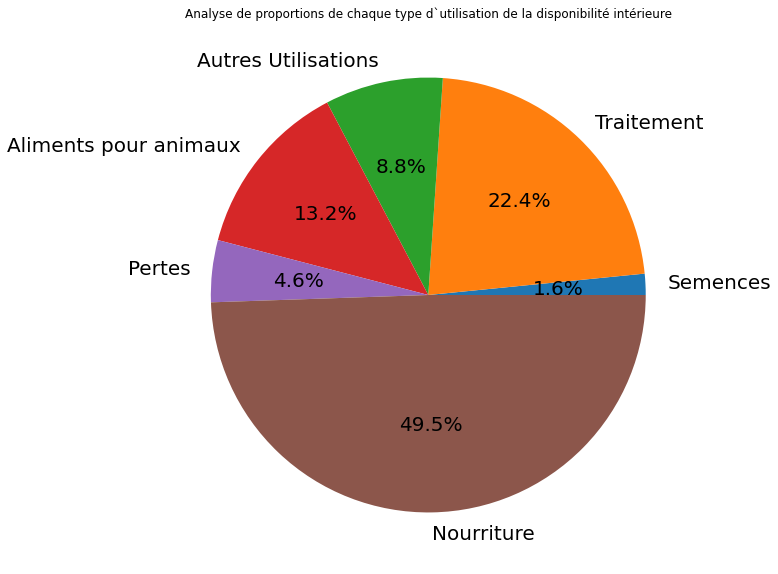

In [21]:
# Set index
analyse4.set_index('Types_utilisation', inplace = True)

# Générer un diagramme de proportion (camembert)
analyse4_pie = analyse4['Quantité (Milliers tonnes)']
analyse4_pie
analyse4_pie.plot(kind='pie', subplots = True, autopct="%1.1f%%", fontsize=20, figsize=(30,10))
plt.axis('off')
plt.title("Analyse de proportions de chaque type d`utilisation de la disponibilité intérieure")

<b><u>Observation</u></b> : 

Seulement 49,5% de la disponibilité intérieure utilisée pour l'alimentation humaine, c'est pour cette raison, même si les données statisques montrent que la proportion des personnes qui pourraient être nourries en 2017 est 110%, l'état de sous_nutrition mondiale est toujours significatif et la tendance d'amélioration de cette situation est lente de 2013 à 2018.

# -----------------------------------------------------------------------------------------------------------

# <b><u>Partie B</u></b> : Remarques de Julien
## <b><u>Remarque 1</u></b> : L’utilisation des céréales (la répartition entre l’alimentation humaine (colonne Nourriture) et l’alimentation pour animaux

Premièrement, je crée une liste appellée 'cereales' qui contient des produits classés dans le groupe céréalier. 

Ensuite, je fais un tri sur ce nouveau df en choissisant que les informations nécessaires analyser l’utilisation des céréales (la répartition entre l’alimentation humaine (colonne Nourriture) et l’alimentation pour animaux.

Enfin, j'appele la fonction <i>str.contains('|'.join())</i> pour faire la recherche des céréales qui se trouvent dans ma liste depuis le df 'dispo_alimentaire_cereales'. Le résultat de cette exécution est nommé 'remarque1'. Ce df se servi à calculer les totalités des produits céréliers qui sont utilisées pour l'alimentation humaine et l'alimentation pour animaux.

In [22]:
# Créer une liste contenant de produits céréaliers
cereales = ['Orge','Blé', 'Maïs', 'Riz', 'Avoine', 'Millet', 'Quinoa', 'Tef', 'Sorgho', 'Seigle', 'Sarrasin', 'Mélanges de céréales']

# Extraire des données
dispo_alimentaire_cereales = dispo_alimentaire[['Zone', 'Produit', 'Aliments pour animaux', 'Nourriture', 'Disponibilité intérieure']].groupby(by = 'Produit').sum().reset_index()

# Recherche de caractères
remarque1 = dispo_alimentaire_cereales[dispo_alimentaire_cereales['Produit'].str.contains('|'.join(cereales))]
print('Liste des produits céréaliers et l`utilisation des céréales')
display(remarque1)

# Effectuer des calculs
total_céréales = remarque1[['Aliments pour animaux','Nourriture','Disponibilité intérieure']].sum().to_frame().reset_index().\
rename(columns= {'index' : 'Utilisation des cereales', 0 : 'Quantité'})

total = remarque1['Disponibilité intérieure'].sum()
print('La totalité de la disponibilté intérieure (produits céréaliers) est égale à ' + str(int(total)) + ' milliers de tonnes')
display(total_céréales)

print('Répartition de l`utilisation des céréales (entre l’alimentation humaine et l’alimentation pour animaux) en pourcentage')
total_céréales['Quantité'] = total_céréales['Quantité']*100 / total
total_céréales.drop(total_céréales[total_céréales['Utilisation des cereales'] == 'Disponibilité intérieure'].index, inplace=True)
total_céréales

Liste des produits céréaliers et l`utilisation des céréales


,Produit,Aliments pour animaux,Nourriture,Disponibilité intérieure
7,Avoine,16251.0,3903.0,23407.0
12,Blé,129668.0,457824.0,679498.0
38,Huile de Germe de Maïs,0.0,2197.0,2276.0
42,Huile de Son de Riz,0.0,845.0,1083.0
52,Maïs,546116.0,125184.0,955799.0
54,Millet,3306.0,23040.0,29911.0
62,Orge,92658.0,6794.0,140439.0
79,Riz (Eq Blanchi),33594.0,377286.0,475656.0
80,Seigle,8099.0,5502.0,16567.0
82,Sorgho,24808.0,24153.0,58237.0


La totalité de la disponibilté intérieure (produits céréaliers) est égale à 2382873 milliers de tonnes


,Utilisation des cereales,Quantité
0,Aliments pour animaux,854500.0
1,Nourriture,1026728.0
2,Disponibilité intérieure,2382873.0


Répartition de l`utilisation des céréales (entre l’alimentation humaine et l’alimentation pour animaux) en pourcentage


,Utilisation des cereales,Quantité
0,Aliments pour animaux,35.860073
1,Nourriture,43.087819


##  <b><u>Remarque 2</u></b> : L'utilisation du manioc par la Thaïlande aux égards de la proportion de personnes en sous-nutrition (exportation vs importation)

J'extraits des informations nécessaires de Thaïlande du fichier dispo_alimentaire.csv et je les placés dans le df 'remarque2' pour avoir une premiere idée de l'économie de Thaïlande sur l'exportation/importation de manioc.

In [23]:
remarque2 = dispo_alimentaire[['Zone', 'Produit', 'Exportations - Quantité', 'Importations - Quantité']]
remarque2 = remarque2[remarque2['Produit'] == 'Manioc']
remarque2_Thai = remarque2[remarque2['Zone'] == 'Thaïlande']
print('Utilisation du manioc par la Thaïlande (exportation et importation)')
remarque2_Thai

Utilisation du manioc par la Thaïlande (exportation et importation)


,Zone,Produit,Exportations - Quantité,Importations - Quantité
13809,Thaïlande,Manioc,25214.0,1250.0


In [24]:
expor_vs_impor_manioc_Thai = remarque2_Thai['Exportations - Quantité']/remarque2_Thai['Importations - Quantité']
print('Taux entre l`exportation et l`importation de manioc en Thaïlande est : ' + str(round(float(expor_vs_impor_manioc_Thai), 3)))

Taux entre l`exportation et l`importation de manioc en Thaïlande est : 20.171


J'effectue ensuite une recherche sur la proportion des personnes en état de sous_nutrition en 2017 pour chaque pays pour comparer avec celle du monde. Pour cela, j'appele le df 'analyse1'.

In [25]:
analyse1['Proportion_sous_nutri_zone'] = analyse1['Personnes_sous_nutrition'] * 10**6 * 100/(analyse1['Population'] * 10**3)
analyse1_sous_nutri = analyse1.sort_values(by = 'Proportion_sous_nutri_zone', ascending = False)
print('Proportion des personnes en état de sous_nutrition en 2017 pour chaque pays')
analyse1_sous_nutri

Proportion des personnes en état de sous_nutrition en 2017 pour chaque pays


,Zone,Personnes_sous_nutrition,Population,Proportion_sous_nutri_zone
78,Haïti,5.3,10982.366,48.259182
157,République populaire démocratique de Corée,12.0,25429.825,47.188685
108,Madagascar,10.5,25570.512,41.062924
103,Libéria,1.8,4702.226,38.279742
100,Lesotho,0.8,2091.534,38.249438
...,...,...,...,...
81,Îles Cook,0.0,17.507,0.000000
82,Îles Marshall,0.0,58.058,0.000000
83,Îles Salomon,0.0,636.039,0.000000
88,Irlande,0.0,4753.279,0.000000


Afin de trouver le lien entre l'état de sous-nutrition et l'utilisation de Manioc en Thaïlande en 2017, je crée un df nommé 'Manioc_sous_nutri'. Ce df servira à analyser le taux de l'état sous-nutrition dans le monde et du Thaïlande. Pour cela, je fais une jointure inter entre les 2 df : 'dispo_alimentaire', 'analyse1' puis je fais un tri sur les colonnes 'Produit' et 'Zone' pour chercher les informations liées au remarque à analyser.

In [26]:
# Jointure interne
Manioc = analyse1_sous_nutri.merge(dispo_alimentaire[dispo_alimentaire['Produit'] == 'Manioc'], on = 'Zone')
#display(Manioc)
Manioc_sous_nutri = Manioc[['Zone', 'Produit', 'Exportations - Quantité', 'Importations - Quantité', 'Proportion_sous_nutri_zone']]\
.sort_values(by = 'Proportion_sous_nutri_zone', ascending = False)

# Remplacer les valeurs manquées par 0
Manioc_sous_nutri.fillna(0, inplace = True)

Manioc_top = Manioc_sous_nutri.sort_values(by = 'Exportations - Quantité', ascending = False).reset_index().head()
print('Top 5 des pays exportateur de manioc en 2017')
Manioc_top

Top 5 des pays exportateur de manioc en 2017


,index,Zone,Produit,Exportations - Quantité,Importations - Quantité,Proportion_sous_nutri_zone
0,40,Thaïlande,Manioc,25214.0,1250.0,8.958268
1,51,Viet Nam,Manioc,8973.0,0.0,6.870989
2,42,Indonésie,Manioc,820.0,1102.0,8.917406
3,24,Cambodge,Manioc,254.0,0.0,14.991184
4,43,Paraguay,Manioc,164.0,0.0,8.737362


Représentation de la quantité d`exportation et d`importation du manioc (en milliers tonnes) du top 5 des pays exportateurs 2017


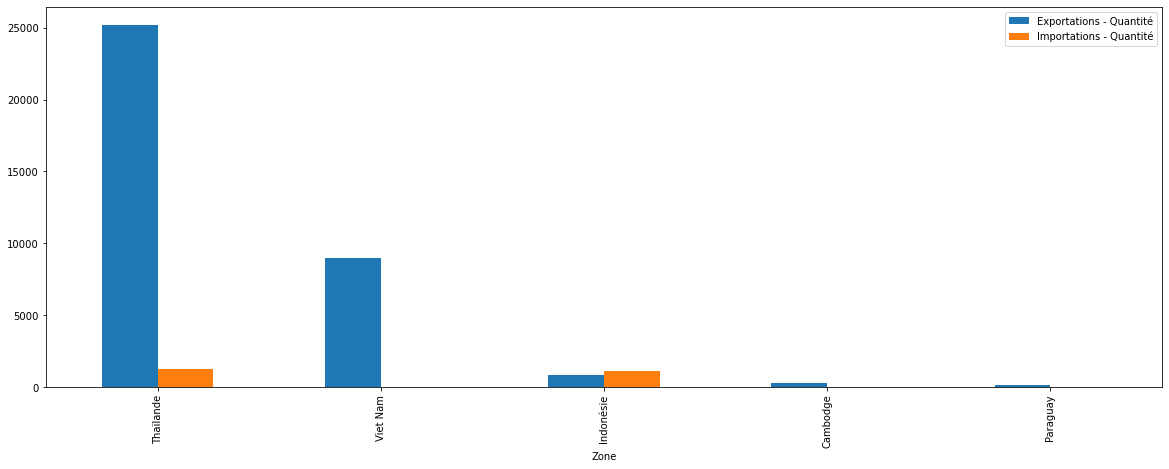

In [27]:
Manioc_sous_nutri[['Exportations - Quantité', 'Importations - Quantité']].sort_values(by = 'Exportations - Quantité', ascending = False).head().plot(kind = 'bar', figsize = (20,7))
plt.gca().get_xaxis()
plt.gca().xaxis
axes = plt.gca()
axes.set_xlabel('Zone')
axes.xaxis.set_ticklabels(['Thaïlande', 'Viet Nam', 'Indonésie', 'Cambodge', 'Paraguay'], fontsize = 10)
print('Représentation de la quantité d`exportation et d`importation du manioc (en milliers tonnes) du top 5 des pays exportateurs 2017')

<b><u>Observation</u> :</b> 
Utilisation du manioc par la Thaïlande aux égards de la proportion de personnes en sous-nutrition (exportation vs importation) en 2017:

<ul>
  <li>Thaïlande est <b>le premier pays exportateur du manioc du monde</b>, et de <b>le taux (exportation/importation)</b> est plus de <b>20 fois</b>. </li>
    
  <li>La proportion des personnes en état de <b>sous-nutrition</b> chez Thaïlande se trouve au 40 sur 165 pays analysées. Cette proportion est assez importante (<b>8.958 %</b>) en comparant avec celle du monde (7,101 %) et celle du 2e pays exportateur (Vietnam) du manioc (6.871 %).</li>
</ul>

    
    
   

# -----------------------------------------------------------------------------------------------------------

# <b><u>Partie C</u></b> : Etude plus fine pour chacun des pays (Demandes de Mélanie)
## <u>Etude 1</u> : Les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017

J'utilise le df 'analyse1' pour répondre à cet étude. Ensuite, je fais affiché le top 10 des pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017 en triant cette proportion en ordre descendant.

In [28]:
print('Top 10 des pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017')
analyse1.sort_values(by = 'Proportion_sous_nutri_zone', ascending = False).head(10)

Top 10 des pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017


,Zone,Personnes_sous_nutrition,Population,Proportion_sous_nutri_zone
78,Haïti,5.3,10982.366,48.259182
157,République populaire démocratique de Corée,12.0,25429.825,47.188685
108,Madagascar,10.5,25570.512,41.062924
103,Libéria,1.8,4702.226,38.279742
100,Lesotho,0.8,2091.534,38.249438
183,Tchad,5.7,15016.753,37.957606
161,Rwanda,4.2,11980.961,35.055619
121,Mozambique,9.4,28649.018,32.810898
186,Timor-Leste,0.4,1243.258,32.173531
0,Afghanistan,10.5,36296.113,28.928718


Cette proportion est supérieure à 28% chez le top des 10 pays, afin de comparer avec la moyenne du reste, j'effectue ensuite le calcul de la moyenne des proportions des pays qui restent et je crée un diagramme en bâton pour étudier cette situation.

,Proportion_sous_nutri_zone
Haïti,48.259182
République populaire démocratique de Corée,47.188685
Madagascar,41.062924
Libéria,38.279742
Lesotho,38.249438
Tchad,37.957606
Rwanda,35.055619
Mozambique,32.810898
Timor-Leste,32.173531
Afghanistan,28.928718


Représentation de top 10 des pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017 en comparant avec la moyenne du reste


<AxesSubplot:>

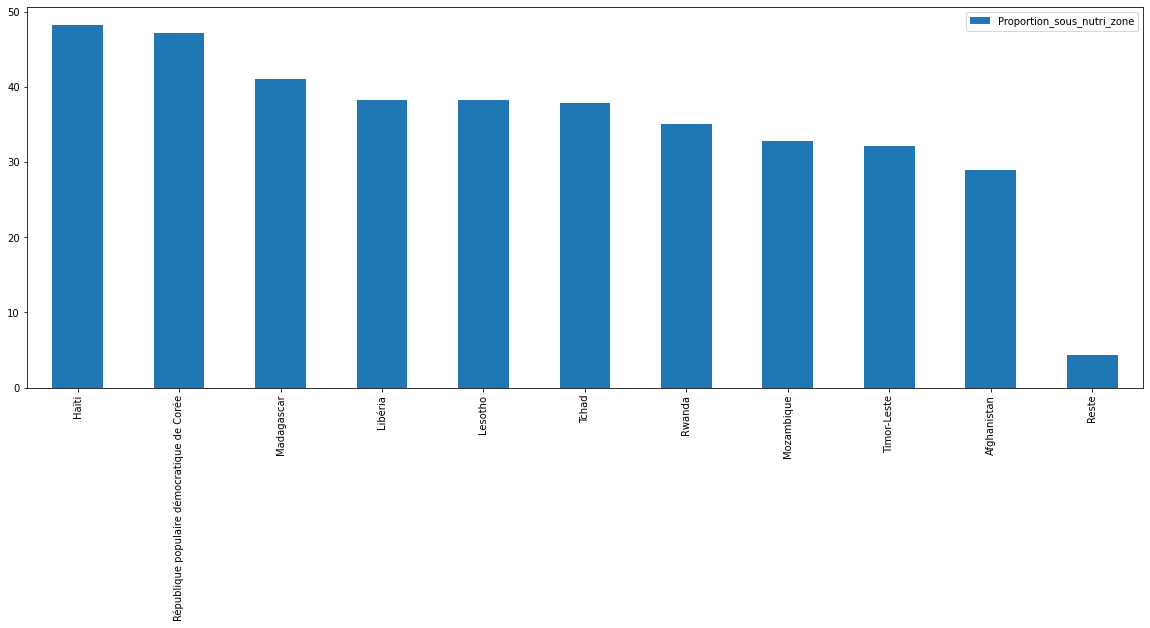

In [29]:
# Créer des nouvelles variables
ordre_sous_zone_nutrition_2017 = analyse1[['Zone', 'Proportion_sous_nutri_zone']].sort_values(by = ['Proportion_sous_nutri_zone'], ascending = False)
ordre_sous_zone_nutrition_2017.set_index('Zone', inplace = True)
tmp_e1 = ordre_sous_zone_nutrition_2017['Proportion_sous_nutri_zone'].head(10).to_frame()

# Calculer la prportion moyenne des restes
tmp_e2 = ordre_sous_zone_nutrition_2017[ordre_sous_zone_nutrition_2017['Proportion_sous_nutri_zone']<28.928718].mean().to_frame()\
.rename(columns = {0 : 'Proportion_sous_nutri_zone'}).rename(index = {'Proportion_sous_nutri_zone': 'Reste'})

# Concaténer des df
display(pd.concat([tmp_e1, tmp_e2]))

#Diagramme
tmp_e3 = pd.concat([tmp_e1, tmp_e2])
print('Représentation de top 10 des pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017 en comparant avec la moyenne du reste')
tmp_e3.plot(kind = 'bar', figsize = (20,7))

<b><u>Observation</u></b> : 

<ul>
  <li>Haïti est le 1e pays que la proportion de personnes sous-alimentées est la plus forte en 2017 car c'est un pays caribéen (situé sur l'île d'Hispaniola) qui est influencé beaucoup par les risques naturels (séisme (ex: 2010), cyclonique (ex: 2008), changement climatique...). </li>
    
  <li>Parmi le top de 5 pays, il y a 3 pays qui sont considérés comme les pays pauvres en Afrique (Madagascar, Libéria, Lesotho).</li>
    
  <li>République populaire démocratique de Corée (Asie de l'Est) se trouve en 2eme position à cause de son régime politique qui restreint son échange économique avec du monde.</li>
</ul>

## <u>Etude 2</u> : Pays qui ont le plus bénéficié d’aide depuis 2013

J'utilise le fichier aide_alimentaire.csv pour cette étude. Comme les parties précédentes, j'appelle la fonction df.info() pour faire une premiere étude de notre données et effectue des modifications nécessaires pour les analyses plus tard. Ensuite je change les noms des colonnes pour homologuer les données.

In [30]:
# Etude de données
aide_alimentaire.info()

# Changer les noms des colonne
aide_alimentaire.rename(columns = {'Pays bénéficiaire' : 'Zone', 'Valeur' : 'Quantité (tonnes)'}, inplace = True)
top_aide_ali = aide_alimentaire.groupby(by = ['Zone']).sum().sort_values(by = ['Quantité (tonnes)'], ascending = [False]).head(10)
display(top_aide_ali['Quantité (tonnes)'].to_frame())
print('Top 10 des pays qui ont le plus bénéficié d’aide depuis 2013')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pays bénéficiaire  1475 non-null   object
 1   Année              1475 non-null   int64 
 2   Produit            1475 non-null   object
 3   Valeur             1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB


,Quantité (tonnes)
Zone,
République arabe syrienne,1858943
Éthiopie,1381294
Yémen,1206484
Soudan du Sud,695248
Soudan,669784
Kenya,552836
Bangladesh,348188
Somalie,292678
République démocratique du Congo,288502


Top 10 des pays qui ont le plus bénéficié d’aide depuis 2013


<b><u>Observation</u></b> : 
Les 10 pays qui ont plus bénéficié d'aide depuis 2013 sont des pays pauvres et/ou ont la guerre civile (ou en état politique instable) dans ce période.

## <u>Etude 3</u> : Pays qui ayant le plus/le moins de disponibilité/habitant

In [31]:
print('Top 10 des pays qui ayant le moins de disponibilité/habitant')
dispo_pays = dispo_alimentaire[['Zone','Disponibilité alimentaire (Kcal/personne/jour)']].groupby('Zone').sum()
dispo_pays.sort_values(by = 'Disponibilité alimentaire (Kcal/personne/jour)').head(10)

Top 10 des pays qui ayant le moins de disponibilité/habitant


,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
République centrafricaine,1879.0
Zambie,1924.0
Madagascar,2056.0
Afghanistan,2087.0
Haïti,2089.0
République populaire démocratique de Corée,2093.0
Tchad,2109.0
Zimbabwe,2113.0
Ouganda,2126.0


In [32]:
print('Top 10 des pays qui ayant le plus de disponibilité/habitant')
dispo_pays.sort_values(by = 'Disponibilité alimentaire (Kcal/personne/jour)').tail(10)

Top 10 des pays qui ayant le plus de disponibilité/habitant


,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Allemagne,3503.0
Égypte,3518.0
Luxembourg,3540.0
Italie,3578.0
Irlande,3602.0
Israël,3610.0
États-Unis d'Amérique,3682.0
Turquie,3708.0
Belgique,3737.0


# -----------------------------------------------------------------------------------------------------------